In [1]:
from lect03 import simulated_annealing
import numpy as np
import matplotlib.pylab as plt

MAX_ITERS = 100_000

%matplotlib inline

(array([0.99657707]), 1.1716435018857538e-05)

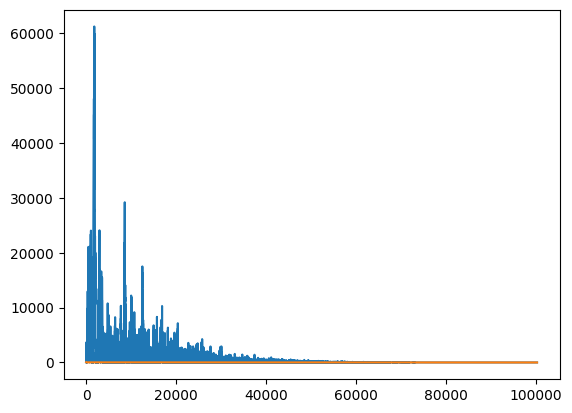

In [2]:
def obj1(x: np.ndarray) -> float:
    [x] = x
    return (x - 1) ** 2


def nbr1(x: np.ndarray) -> np.ndarray:
    [x] = x
    perturbation = (np.random.uniform() - 0.5) * 20
    return np.array([x + perturbation])


x0 = np.random.uniform(-10, 10, size=1)
res1 = simulated_annealing(obj1, nbr1, x0)
plt.plot(np.arange(len(res1.c_progress)), res1.c_progress)
plt.plot(np.arange(len(res1.b_progress)), res1.b_progress)
res1.solution, res1.cost

(array([1.04656807, 1.07960834]), 0.026806247371192995)

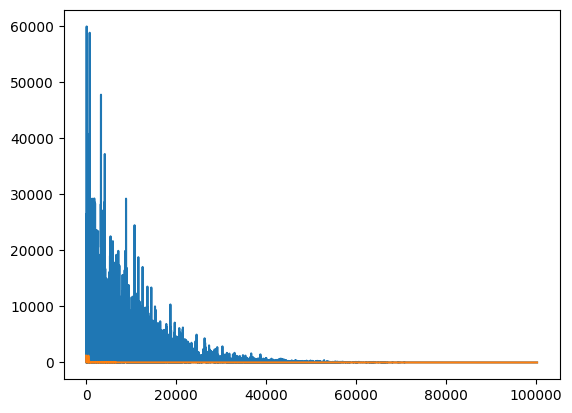

In [3]:
def obj2(x: np.ndarray) -> float:
    [x1, x2] = x
    return (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2


def nbr2(x: np.ndarray) -> np.ndarray:
    perturbation = (np.random.uniform(size=2) - 0.5) * 4
    return x + perturbation


x0 = np.random.uniform(-2, 2, size=2)
res2 = simulated_annealing(obj2, nbr2, x0)
plt.plot(np.arange(len(res2.c_progress)), res2.c_progress)
plt.plot(np.arange(len(res2.b_progress)), res2.b_progress)
res2.solution, res2.cost

CPU times: user 12.4 s, sys: 383 ms, total: 12.8 s
Wall time: 12.3 s


(array([ 0.00135031, -0.00052058]), 5.445293254930735e-05)

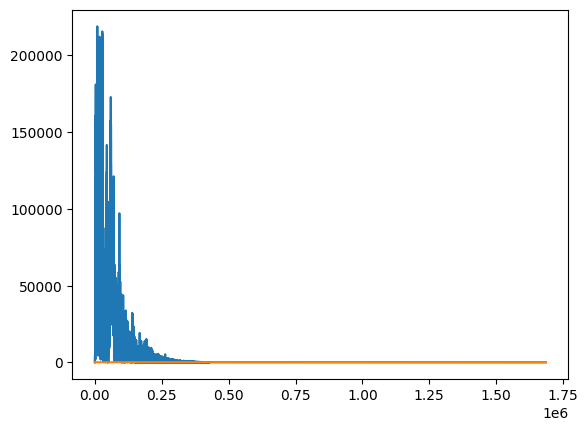

In [4]:
%%time

def obj3(x: np.ndarray) -> float:
    [x1, x2] = x
    return x1 ** 2 + x2 ** 2 + 25 * (np.sin(x1) ** 2 + np.sin(x2) ** 2)


def nbr3(x: np.ndarray) -> np.ndarray:
    perturbation = (np.random.uniform(size=2) - 0.5) * 10
    return x + perturbation


x0 = np.random.uniform(-5, 5, size=2)
res3 = simulated_annealing(obj3, nbr3, x0,
                           initial_temperature=100_000,
                           metropolis_iters=2500,
                           max_iterations=5_000_000)
plt.plot(np.arange(len(res3.c_progress)), res3.c_progress)
plt.plot(np.arange(len(res3.b_progress)), res3.b_progress)
res3.solution, res3.cost